In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [67]:
# Load Model
model_gender = load_model('./models/gender_08_0.215.h5')
model_race = load_model('./models/race_05_0.281.h5')
model_age = load_model('./models/age_77_77.805.h5')

In [68]:
face_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_alt.xml')

In [69]:
# ages = []
# genders = []

In [70]:
image_size = 224

In [93]:
pic = cv2.imread('./sample_images/HongGyu.jpg')
faces = face_cascade.detectMultiScale(pic, scaleFactor=1.11, minNeighbors=8)
faces

array([[229,  49, 189, 189]])

1/1 [==============================] - 0s 134ms/step


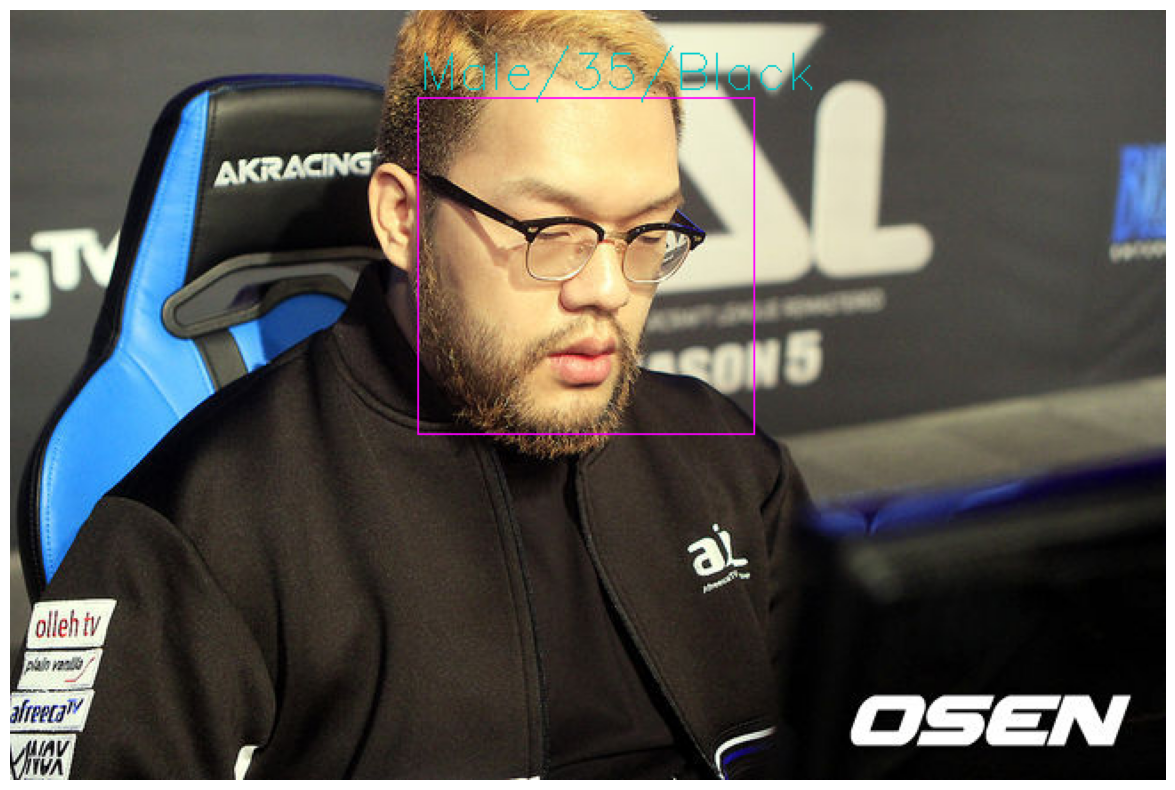

In [94]:
for (x, y, w, h) in faces :
    img = pic[y : y + h, x : x + w]
    img = cv2.resize(img, (image_size, image_size))

    predict_gender = model_gender.predict(np.array(img).reshape(-1, image_size, image_size, 3))
    gender = np.round(predict_gender)
    predict_race = model_race.predict(np.array(img).reshape(-1, image_size, image_size, 3))
    race = np.argmax(predict_race)

    
    predict_age = model_age.predict(np.array(img).reshape(-1, image_size, image_size, 3))
    predict_age = int(np.round(predict_age))
    
    if gender == 0 :
        gend = 'Female'
    else :
        gend = 'Male'
        
    if race == 0 :
        rac = 'Asian'
        
    elif race == 1 :
        rac = 'Black'
        
    else :
        rac = 'White'
    
    cv2.rectangle(pic, (x, y), (x + w, y + h), (255, 0, 255), 1)
    cv2.putText(pic, str(gend) + '/' + str(predict_age) +'/' + str(rac), (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, w * 0.005, (204, 204, 0), 1)

pic1 = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 10))
plt.axis('off')
plt.imshow(pic1)
plt.show()
